# Data preprocessing 

In [53]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
import math
import numpy as np
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader,random_split,TensorDataset
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.tensorboard import SummaryWriter
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay
import pandas as pd

In [54]:
# setting seed
def setup_seed(seed):
    torch.manual_seed(seed)                 #setting seed for cpu
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)        #setting seed for gpu
        torch.cuda.manual_seed_all(seed)    #setting seed for multi gpu
    random.seed(seed)
    np.random.seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmard = False

setup_seed(666)

In [55]:
# Parameters for waveform generations  
size_of_freqs = 10000
samples = 1000

# Senario 1 (Original): generting low frequency waveforms

In [56]:
# low_freqs = np.random.normal(1,0.1,size = size_of_freqs)    # Random low frequencies
# phases = np.random.uniform(0,2*np.pi,size = size_of_freqs)  # Regular time sampling
# tt = np.linspace(0, 5, num = samples) 
# lf_signals = np.sin(np.outer(low_freqs,tt) + phases.reshape(-1,1)) # Should give an array of shape (100,1000) ― 100 different low-frequency waveforms


# # generting high frequency waveforms
# high_freqs = np.random.normal(20,0.1,size = size_of_freqs) # Random higher frequencies
# phases = np.random.uniform(0,2*np.pi,size = size_of_freqs)
# tt = np.linspace(0, 5, num=samples)
# hf_signals = np.sin(np.outer(high_freqs,tt)+phases.reshape(-1,1)) # 100 high-frequency waveforms


# # plotting
# plt.subplot(2, 1, 2)
# plt.subplot(2,1,1)
# plt.plot(tt, lf_signals[1,:], color = 'skyblue', label= "Low freq")
# plt.plot(tt, lf_signals[5000,:], color = 'skyblue')
# plt.plot(tt, lf_signals[9999,:], color = 'skyblue')
# plt.title("Synthetic Waveforms")
# # plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.legend(loc= "upper right")

# plt.subplot(2,1,2)
# plt.plot(tt, hf_signals[1,:], color = 'maroon', label= "High freq")
# plt.plot(tt, hf_signals[5000,:], color = 'maroon')
# plt.plot(tt, hf_signals[9999,:], color = 'maroon')
# # plt.title("High Frequncy Waveforms")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.legend(loc= "upper right")
# plt.show()

# # combining the data into dataset
# X_data = np.vstack([lf_signals,hf_signals])
# Y_data = np.hstack([np.zeros(size_of_freqs),np.ones(size_of_freqs)])   # 0 = ‘low’, 1=‘high’

# Senario 2: generting low frequency waveforms with noise

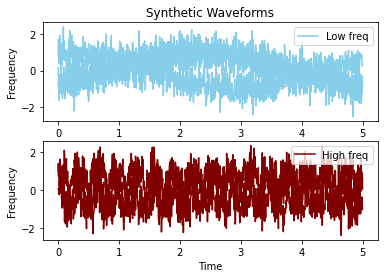

In [57]:
low_freqs = np.random.normal(1,0.1,size = size_of_freqs)    # Random low frequencies
phases = np.random.uniform(0,2*np.pi,size = size_of_freqs)  # Regular time sampling
tt = np.linspace(0, 5, num = samples) 
lf_signals = np.sin(np.outer(low_freqs,tt) + phases.reshape(-1,1)) # Should give an array of shape (100,1000) ― 100 different low-frequency waveforms
lf_signals += np.random.normal(0,0.5,size = (10000,1000))

# generting high frequency waveforms with noise
high_freqs = np.random.normal(20,0.1,size = size_of_freqs) # Random higher frequencies
phases = np.random.uniform(0,2*np.pi,size = size_of_freqs)
tt = np.linspace(0, 5, num=samples)
hf_signals = np.sin(np.outer(high_freqs,tt)+phases.reshape(-1,1)) # 100 high-frequency waveforms
hf_signals += np.random.normal(0,0.5,size = (10000,1000))


# plotting
plt.subplot(2, 1, 2)
plt.subplot(2,1,1)
plt.plot(tt, lf_signals[1,:], color = 'skyblue', label= "Low freq")
plt.plot(tt, lf_signals[5000,:], color = 'skyblue')
plt.plot(tt, lf_signals[9999,:], color = 'skyblue')
plt.title("Synthetic Waveforms")
# plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend(loc= "upper right")

plt.subplot(2,1,2)
plt.plot(tt, hf_signals[1,:], color = 'maroon', label= "High freq")
plt.plot(tt, hf_signals[5000,:], color = 'maroon')
plt.plot(tt, hf_signals[9999,:], color = 'maroon')
# plt.title("High Frequncy Waveforms")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.legend(loc= "upper right")
plt.show()

# combining the data into dataset
X_data = np.vstack([lf_signals,hf_signals])
Y_data = np.hstack([np.zeros(size_of_freqs),np.ones(size_of_freqs)])   # 0 = ‘low’, 1=‘high’


# Senario 3 : generting low frequency waveforms with extra random frequency waveforms

In [58]:
# low_freqs = np.random.normal(1,0.1,size = 5000)    # Random low frequencies
# phases = np.random.uniform(0,2*np.pi,size = 5000)  # Regular time sampling
# tt = np.linspace(0, 5, num = samples) 
# lf_signals = np.sin(np.outer(low_freqs,tt) + phases.reshape(-1,1)) # Should give an array of shape (100,1000) ― 100 different low-frequency waveforms


# # generting extra frequency waveforms with different frequency
# extra_freqs = np.random.normal(5,0.1,size = 5000) # Random higher frequencies
# phases = np.random.uniform(0,2*np.pi,size = 5000)
# tt = np.linspace(0, 5, num=samples)
# extra_signals = np.sin(np.outer(extra_freqs,tt)+phases.reshape(-1,1)) # 100 high-frequency waveforms


# # generting high frequency waveforms 
# high_freqs = np.random.normal(20,0.1,size = size_of_freqs) # Random higher frequencies
# phases = np.random.uniform(0,2*np.pi,size = size_of_freqs)
# tt = np.linspace(0, 5, num=samples)
# hf_signals = np.sin(np.outer(high_freqs,tt)+phases.reshape(-1,1)) # 100 high-frequency waveforms

# print(lf_signals.shape)
# print(extra_signals.shape)
# print(hf_signals.shape)

# # plotting
# plt.subplot(3, 1, 1)
# plt.subplot(3,1,1)
# plt.plot(tt, lf_signals[1,:], color = 'skyblue', label= "Low freq")
# plt.plot(tt, lf_signals[2000,:], color = 'skyblue')
# plt.plot(tt, lf_signals[4999,:], color = 'skyblue')
# plt.title("Synthetic Waveforms")
# # plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.legend(loc= "upper right")

# plt.subplot(3,1,2)
# plt.plot(tt, hf_signals[1,:], color = 'maroon', label= "High freq")
# plt.plot(tt, hf_signals[2000,:], color = 'maroon')
# plt.plot(tt, hf_signals[4999,:], color = 'maroon')

# # plt.title("High Frequncy Waveforms")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.legend(loc= "upper right")


# plt.subplot(3,1,3)
# plt.plot(tt, hf_signals[1,:], color = 'yellow', label= "Extra freq")
# plt.plot(tt, hf_signals[5000,:], color = 'yellow')
# plt.plot(tt, hf_signals[9999,:], color = 'yellow')
# # plt.title("Extra Frequncy Waveforms")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# plt.legend(loc= "upper right")
# plt.show()

# # combining the data into dataset
# X_data = np.vstack([lf_signals,hf_signals,extra_signals])
# Y_data = np.hstack([np.zeros(size_of_freqs),np.ones(size_of_freqs)])   # 0 = ‘low’, 1=‘high’


# Senario 4: Reduce the distance between low and high frequncy waveforms

In [59]:
# # reduce the high frequncy from 20 to 5

# #generting low frequency waveforms
# low_freqs = np.random.normal(1,0.1,size = size_of_freqs)    # Random low frequencies
# phases = np.random.uniform(0,2*np.pi,size = size_of_freqs)  # Regular time sampling
# tt = np.linspace(0, 5, num = samples) 
# lf_signals = np.sin(np.outer(low_freqs,tt) + phases.reshape(-1,1)) # Should give an array of shape (100,1000) ― 100 different low-frequency waveforms


# # generting high frequency waveforms
# high_freqs = np.random.normal(1.5,0.1,size = size_of_freqs) # Random higher frequencies
# phases = np.random.uniform(0,2*np.pi,size = size_of_freqs)
# tt = np.linspace(0, 5, num=samples)
# hf_signals = np.sin(np.outer(high_freqs,tt)+phases.reshape(-1,1)) # 100 high-frequency waveforms


# # plotting
# plt.subplot(2, 1, 2)
# plt.subplot(2,1,1)
# plt.plot(tt, lf_signals[1,:], color = 'skyblue', label= "Low freq")
# plt.plot(tt, lf_signals[5000,:], color = 'skyblue')
# plt.plot(tt, lf_signals[9999,:], color = 'skyblue')
# plt.title("Synthetic Waveforms")
# # plt.xlabel("Time")
# # plt.xlim([0,50])
# plt.ylabel("Frequency")
# plt.legend(loc= "upper right")

# plt.subplot(2,1,2)
# plt.plot(tt, hf_signals[1,:], color = 'maroon', label= "High freq")
# plt.plot(tt, hf_signals[5000,:], color = 'maroon')
# plt.plot(tt, hf_signals[9999,:], color = 'maroon')
# # plt.title("High Frequncy Waveforms")
# plt.xlabel("Time")
# plt.ylabel("Frequency")
# # plt.xlim([0,50])
# # plt.style.use('bmh')
# plt.legend(loc= "upper right")
# plt.show()

# # combining the data into dataset
# X_data = np.vstack([lf_signals,hf_signals])
# Y_data = np.hstack([np.zeros(size_of_freqs),np.ones(size_of_freqs)])   # 0 = ‘low’, 1=‘high’

In [60]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# The 1D CNN model

In [61]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(in_channels=1000, out_channels=500, kernel_size=1)
        self.conv2 = nn.Conv1d(in_channels=500, out_channels=50, kernel_size=1)

        self.fc1 = nn.Linear(in_features=50, out_features=40)
        self.fc2 = nn.Linear(in_features=40, out_features=30)
        self.out = nn.Linear(in_features=30, out_features=2)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
       
        x = x.flatten(1) # flatten the tensor starting at dimension 1

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

if torch.cuda.is_available():
    cnn_cuda=cnn_cuda.cuda()
    
if __name__=='__main__':
    cnn = Network()
    input = torch.ones(10000, 1000, 1)
    output = cnn(input)
    print(output.shape)

torch.Size([10000, 2])


# Dataset splitting

In [62]:
# Splitting the dataset into training set and rest of data
train_x, rest_x, train_y, rest_y = train_test_split(X_data, Y_data, train_size=0.8, random_state=0)

# spliting the rest of data into validation set and testing set
valid_x, test_x, valid_y, test_y = train_test_split(rest_x, rest_y, test_size=0.5, random_state=0)

# 80%
train_x = torch.from_numpy(train_x).type(torch.float32).unsqueeze(-1)
train_y = torch.from_numpy(train_y).type(torch.int64)

# 10%
valid_x = torch.from_numpy(valid_x).type(torch.float32).unsqueeze(-1)
valid_y = torch.from_numpy(valid_y).type(torch.int64)

# 10%
test_x = torch.from_numpy(test_x).type(torch.float32).unsqueeze(-1)
test_y = torch.from_numpy(test_y).type(torch.int64)


In [63]:
print("train_x.shape = ", train_x.shape, " train_y.shape = ", train_y.shape)
print("valid_x.shape = ", valid_x.shape, " valid_y.shape = ", valid_y.shape)
print("test_x.shape = ", test_x.shape, " test_y.shape = ", test_y.shape)

train_x.shape =  torch.Size([16000, 1000, 1])  train_y.shape =  torch.Size([16000])
valid_x.shape =  torch.Size([2000, 1000, 1])  valid_y.shape =  torch.Size([2000])
test_x.shape =  torch.Size([2000, 1000, 1])  test_y.shape =  torch.Size([2000])


In [64]:
batch = 64

train_ds = TensorDataset(train_x, train_y)
train_dl = DataLoader(train_ds, batch_size=batch, shuffle=True)

valid_ds = TensorDataset(valid_x, valid_y)
valid_dl = DataLoader(valid_ds, batch_size=batch, shuffle=True)

test_ds = TensorDataset(test_x, test_y)
test_dl = DataLoader(test_ds, batch_size=batch, shuffle=True)
print(len(test_ds))

2000


In [65]:
train_data_size = len(train_ds)
valid_data_size = len(valid_ds)
test_data_size = len(test_ds)

# Training and testing

In [66]:
# parameters for training model
# total No. of traing
total_train_step = 0

# total No. of testing
total_test_step = 0

# Loss function 
loss_fn = nn.CrossEntropyLoss()

if torch.cuda.is_available():
    loss_fn = loss_fn.cuda()
    
# Optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(cnn.parameters(), lr = learning_rate, momentum=0.9)

# epoch
epoch = 8

# # tensorboard
# writer = SummaryWriter("logs")
# start_time = time.time()

In [67]:
train_losses = []
train_acces = []
test_losses = []
test_acces = []


# save_path = ".\\" 
# early_stopping = EarlyStopping(save_path)

for i in range(epoch):
#     print("-------The {} epoch of training-------".format(i+1))
    
    # training
    train_loss = 0.0
    train_acc = 0.0
    cnn.train()  # training mode
    
    for data in train_dl:
        train_x, train_y = data
        
#         if torch.cuda.is_available():
#             train_x = train_x.cuda()
#             train_y = train_y.cuda()
        
        outputs = cnn(train_x)          # use train_x as inputs to the model
        loss = loss_fn(outputs,train_y) # calculate the loss between outputs and train_y
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() 
        
        # record train loss
        train_loss += loss.item()
        
        # train accuracy        
        train_accuracy = (outputs.argmax(1) == train_y).sum()
        train_acc += train_accuracy
        
    train_losses.append(train_loss/train_data_size)
    train_acces.append(train_acc/train_data_size)
    
    # testing    
    test_loss = 0.0
    test_acc = 0.0
    cnn.eval()
    
    with torch.no_grad():
        for data in test_dl:
            test_x,test_y = data

    #             if torch.cuda.is_available():
    #                 test_x = test_x.cuda()
    #                 test_y = test_y.cuda()

            outputs = cnn(test_x)
            loss = loss_fn(outputs, test_y)

            # record train loss
            test_loss += loss.item()       

            # test accuracy         
            test_accuracy = (outputs.argmax(1) == test_y).sum()
            test_acc += test_accuracy

        test_losses.append(test_loss/test_data_size)
        test_acces.append(test_acc/test_data_size)

    print("epoch:{},Train Loss: {:.4f},Train Acc: {:.2f},Test Loss: {:.4f},Test Acc: {:.2f}".format(i+1, 
          train_loss/train_data_size, 
          train_acc/train_data_size,
          test_loss/test_data_size, 
          test_acc/test_data_size))

epoch:1,Train Loss: 0.0108,Train Acc: 0.50,Test Loss: 0.0107,Test Acc: 0.50
epoch:2,Train Loss: 0.0087,Train Acc: 0.86,Test Loss: 0.0050,Test Acc: 1.00
epoch:3,Train Loss: 0.0018,Train Acc: 1.00,Test Loss: 0.0003,Test Acc: 1.00
epoch:4,Train Loss: 0.0001,Train Acc: 1.00,Test Loss: 0.0001,Test Acc: 1.00
epoch:5,Train Loss: 0.0000,Train Acc: 1.00,Test Loss: 0.0000,Test Acc: 1.00
epoch:6,Train Loss: 0.0000,Train Acc: 1.00,Test Loss: 0.0000,Test Acc: 1.00
epoch:7,Train Loss: 0.0000,Train Acc: 1.00,Test Loss: 0.0000,Test Acc: 1.00
epoch:8,Train Loss: 0.0000,Train Acc: 1.00,Test Loss: 0.0000,Test Acc: 1.00


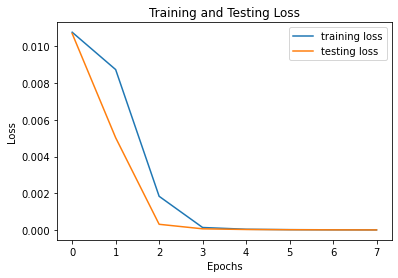

In [68]:
# plotting training and testing loss
plt.plot(train_losses,label='training loss')
plt.plot(test_losses,label='testing loss')

plt.title("Training and Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = "upper right")
plt.show()

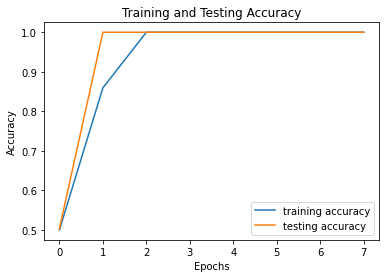

In [69]:
# plotting training and testing acc
plt.plot(train_acces,label='training accuracy')
plt.plot(test_acces,label='testing accuracy')

plt.title("Training and Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")
plt.show()

torch.Size([2000])
torch.Size([1000, 1000, 1])
torch.Size([1000, 1000, 1])


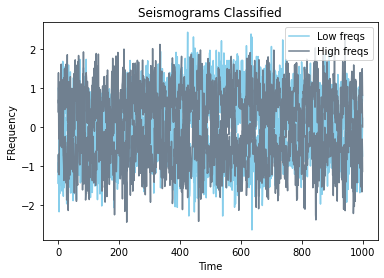

In [70]:
# plotting the classification results 
tt = np.linspace(0, 1000, num = samples) 
cnn_outputs = cnn(valid_x).argmax(1)
print(cnn_outputs.shape)

x1 = valid_x[cnn_outputs == 0]      # low frequency 
x2 = valid_x[cnn_outputs == 1]      # high frequency 

print(x1.shape)
print(x2.shape)

# before event
plt.plot(tt, x1[0,:], color = 'skyblue',label='Low freqs')   
plt.plot(tt, x1[199,:],color = 'skyblue')             
plt.plot(tt, x1[700,:],color = 'skyblue')

# after event 
plt.plot(tt, x2[88,:], color = 'slategray',label='High freqs')   
plt.plot(tt, x2[99,:], color = 'slategray')             
plt.plot(tt, x2[700,:], color = 'slategray') 

plt.legend(loc= "upper right")
plt.title("Seismograms Classified")
plt.xlabel("Time")
plt.ylabel("FRequency")
plt.show()

torch.Size([2000, 2])
predict number : tensor([1, 1, 0,  ..., 1, 1, 1])
true number: tensor([1, 1, 0,  ..., 1, 1, 1])


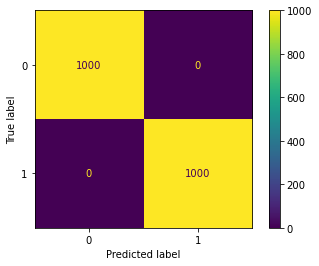

In [71]:
test_outputs = cnn(valid_x)
print(test_outputs.shape)
pred_y = test_outputs.argmax(1)

print('predict number :',valid_y)
print('true number:',valid_y)

# confusion matrix
cm = confusion_matrix(valid_y, pred_y, labels=None, sample_weight=None)
confusion_matrix(valid_y, pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Evaluating 

In [72]:
test_output = cnn(valid_x)
pred_y = cnn(valid_x).argmax(1)

print('predict number :',pred_y)
print('true number:',valid_y)

predict number : tensor([1, 1, 0,  ..., 1, 1, 1])
true number: tensor([1, 1, 0,  ..., 1, 1, 1])


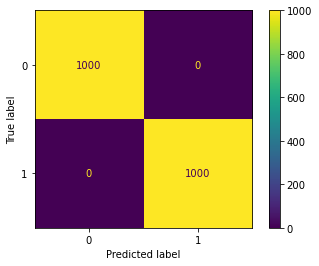

In [73]:
# confusion matrix
cm = confusion_matrix(valid_y, pred_y, labels=None, sample_weight=None)
confusion_matrix(valid_y, pred_y)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [74]:
# f1_score
report = f1_score(valid_y, pred_y)
print(report)

1.0


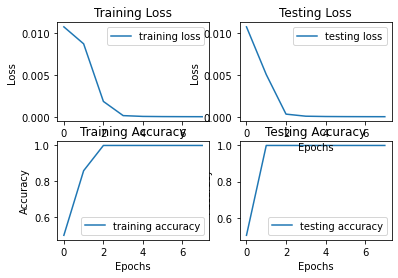

In [75]:
# plotting training and testing loss
plt.subplot(2,2,4)

plt.subplot(2,2,1)
plt.plot(train_losses,label='training loss')
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = "upper right")

plt.subplot(2,2,2)
plt.plot(test_losses,label='testing loss')
plt.title("Testing Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = "upper right")


plt.subplot(2,2,3)
plt.plot(train_acces,label='training accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.subplot(2,2,4)
plt.plot(test_acces,label='testing accuracy')
plt.title("Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")


plt.show()

Text(0, 0.5, 'y')

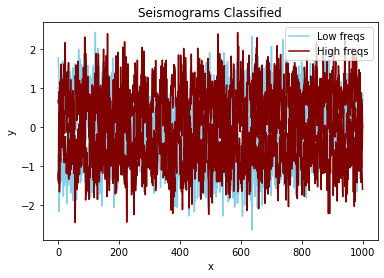

In [76]:
# before event
plt.plot(tt, x1[0,:], color = 'skyblue',label='Low freqs')   
plt.plot(tt, x1[555,:],color = 'skyblue')             
plt.plot(tt, x1[700,:],color = 'skyblue')
# after event 
plt.plot(tt, x2[0,:], color = 'maroon',label='High freqs')   
plt.plot(tt, x2[555,:], color = 'maroon')             
plt.plot(tt, x2[700,:], color = 'maroon') 

plt.legend(loc= "upper right")
plt.title("Seismograms Classified")
plt.xlabel("x")
plt.ylabel("y")